### Ramsey RESET Test

The Ramsey Regression Equation Specification Error Test (RESET) is a diagnostic used to detect misspecification in linear regression models, particularly errors in the functional form. It assesses whether nonlinear combinations of the model's fitted values (such as 𝑦^2, 𝑦^3) can explain the dependent variable better than the original model. The test augments the original regression with powers of the predicted values and evaluates their joint significance using an F-test. A low p-value suggests that the added nonlinear terms significantly improve the model fit, indicating potential misspecification due to omitted nonlinearities or incorrect functional form. Rejection of 
𝐻0 suggests the model may benefit from nonlinear terms or a different functional form.

### Mathematical Definition

Given an original linear regression model:

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_k x_k + \varepsilon
$$

The Ramsey RESET test augments this model by including powers of the predicted values:

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_k x_k + \gamma_2 \hat{y}^2 + \gamma_3 \hat{y}^3 + \varepsilon
$$

The null hypothesis is:

$$
H_0: \gamma_2 = \gamma_3 = 0
$$

### Visual Illustration
![RESET Example](Ramsey_RESET_Test_Example.png)


Figure 1: Illustration of the Ramsey RESET Test: Detecting Model Misspecification

This figure shows how the Ramsey RESET test identifies potential misspecification in a linear regression model by comparing the true quadratic relationship with a misspecified linear fit. This plot illustrates the key concept behind the Ramsey RESET test:

The blue points represent observed data generated from a true quadratic relationship.

The green curve shows the actual quadratic relationship in the data.

The red dashed line represents a misspecified linear regression model that fails to capture the quadratic trend.


The Ramsey RESET test would detect this misspecification by adding squared (𝑦^2) and cubic (𝑦^3) terms of the fitted values to the model and testing if they are statistically significant.


### When Would Someone Use This Test?

The Ramsey RESET test is useful when you suspect that your linear regression model might be too simple and is missing important relationships. For instance, after fitting a model, if residual plots show patterns (rather than randomness), or if theory suggests interactions or curvature that aren't included, this test can help check for functional form errors. It's especially handy in economics, biology, and social sciences, where relationships between variables often aren't strictly linear. It helps validate whether the model structure itself is appropriate, not just whether the coefficients are significant. It serves as a quick check to guide model refinement or nonlinear modeling decisions.


### References: 

1. Ramsey, J. B. (1969). Tests for specification errors in classical linear least-squares regression analysis. Journal of the Royal Statistical Society: Series B (Methodological), 31(2), 350-371. https://www.jstor.org/stable/2984219

2. Sapra, S. (2018). A regression error specification test (RESET) for the truncated regression model. International Journal of Accounting and Economics Studies, 6(2), 53-55. https://doi.org/10.14419/ijaes.v6i2.13478

3. OpenAI. (2023). ChatGPT. https://chatgpt.com

In [8]:
# Example usage of the reset_test function using the Iris dataset

import numpy as np
import statsmodels.api as sm
import pandas as pd
from sklearn.datasets import load_iris
from BIOM480Tests import reset_test

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Define independent and dependent variables
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]  # all the features
X = sm.add_constant(X)  # add intercept
y = df['species']  # species as dependent variable (a classification target)

# Check for missing (NaN) or infinite values in X
if X.isnull().values.any() or np.any(np.isinf(X)):
    print("Data contains NaN or infinite values.")
    # Handle missing data (e.g., by dropping or imputing)
    X = X.dropna()  # or choose imputation depending on the situation
    y = y[X.index]  # Make sure y aligns with the modified X
else:
    print("No missing or infinite values in X.")

# Fit the initial linear regression model
model = sm.OLS(y, X).fit()

# Call the Ramsey RESET test with the degree argument
result = reset_test(model, degree=3)
print(result)




No missing or infinite values in X.
{'F-statistic': 13.432789482719862, 'p-value': 0.00034689654102227203, 'df_diff': 1, 'Null Hypothesis': 'Model is correctly specified. (No omitted nonlinear terms)'}


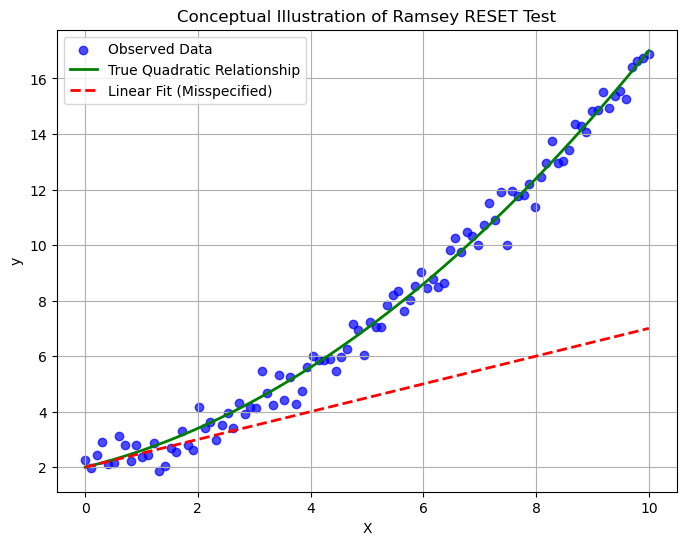

In [11]:
# Conceptal illustration of the Ramsey RESET test

import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y_true = 2 + 0.5 * X + 0.1 * X**2  # True quadratic relationship
y = y_true + np.random.normal(scale=0.5, size=100)

# Fit linear model predictions
y_linear = 2 + 0.5 * X  # Linear fit (misspecified)

# Plot data and fits
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Observed Data", color="blue", alpha=0.7)
plt.plot(X, y_true, label="True Quadratic Relationship", color="green", linewidth=2)
plt.plot(X, y_linear, label="Linear Fit (Misspecified)", color="red", linestyle="--", linewidth=2)

# Add labels and legend
plt.title("Conceptual Illustration of Ramsey RESET Test")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
# Save the image
plt.savefig('Ramsey_RESET_Test_example.png', dpi=300, bbox_inches='tight')
plt.show()

